In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


In [78]:
df = pd.read_csv('insurance_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1250 non-null   int64  
 1   gender    1250 non-null   object 
 2   bmi       1250 non-null   float64
 3   weight    1250 non-null   float64
 4   children  1250 non-null   int64  
 5   smoker    1250 non-null   object 
 6   region    1250 non-null   object 
 7   expenses  1250 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 78.2+ KB


In [4]:
df.head()

,age,gender,bmi,weight,children,smoker,region,expenses
0,19,female,27.9,55.651235,0,yes,southwest,16884.92
1,18,male,33.8,76.008228,1,no,southeast,1725.55
2,28,male,33.0,58.492328,3,no,southeast,4449.46
3,33,male,22.7,49.778750,0,no,northwest,21984.47
4,32,male,28.9,79.693884,0,no,northwest,3866.86


In [5]:
# No null values so we dont need to do the preprocessing to remove null values
df.isnull().sum()

age         0
gender      0
bmi         0
weight      0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [81]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['gender']= label_encoder.fit_transform(df['gender'])
df['gender'].unique()

array([0, 1])

In [82]:
df['smoker']= label_encoder.fit_transform(df['smoker'])
df['smoker'].unique()

array([1, 0])

In [83]:
df['region']= label_encoder.fit_transform(df['region'])
df['region'].unique()

array([3, 2, 1, 0])

In [84]:
# So lets do some EDA (Exploratory Data Analysis) on this dataset
# Here is the Correlation matrix, we can see which columns relate to each other more
# We can remove the colums that have a low value of correlation with the expensed column
# these columns dont play an important role in predicting expenses
correlation = df.corr()
correlation['expenses'].sort_values()

region     -0.009122
gender      0.045230
children    0.062358
weight      0.139347
bmi         0.200280
age         0.298583
smoker      0.787596
expenses    1.000000
Name: expenses, dtype: float64

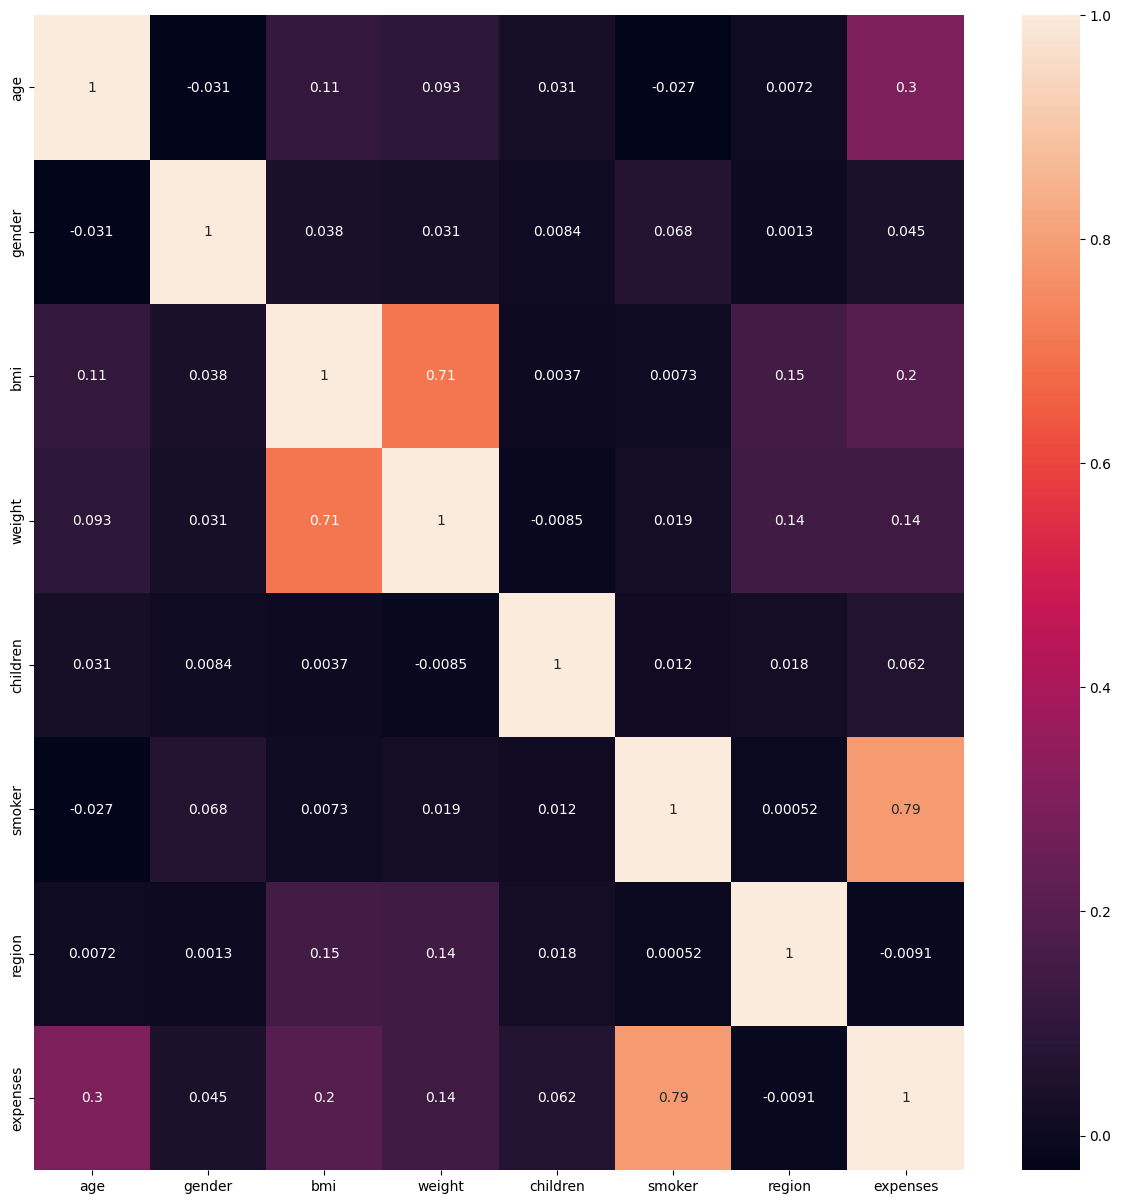

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

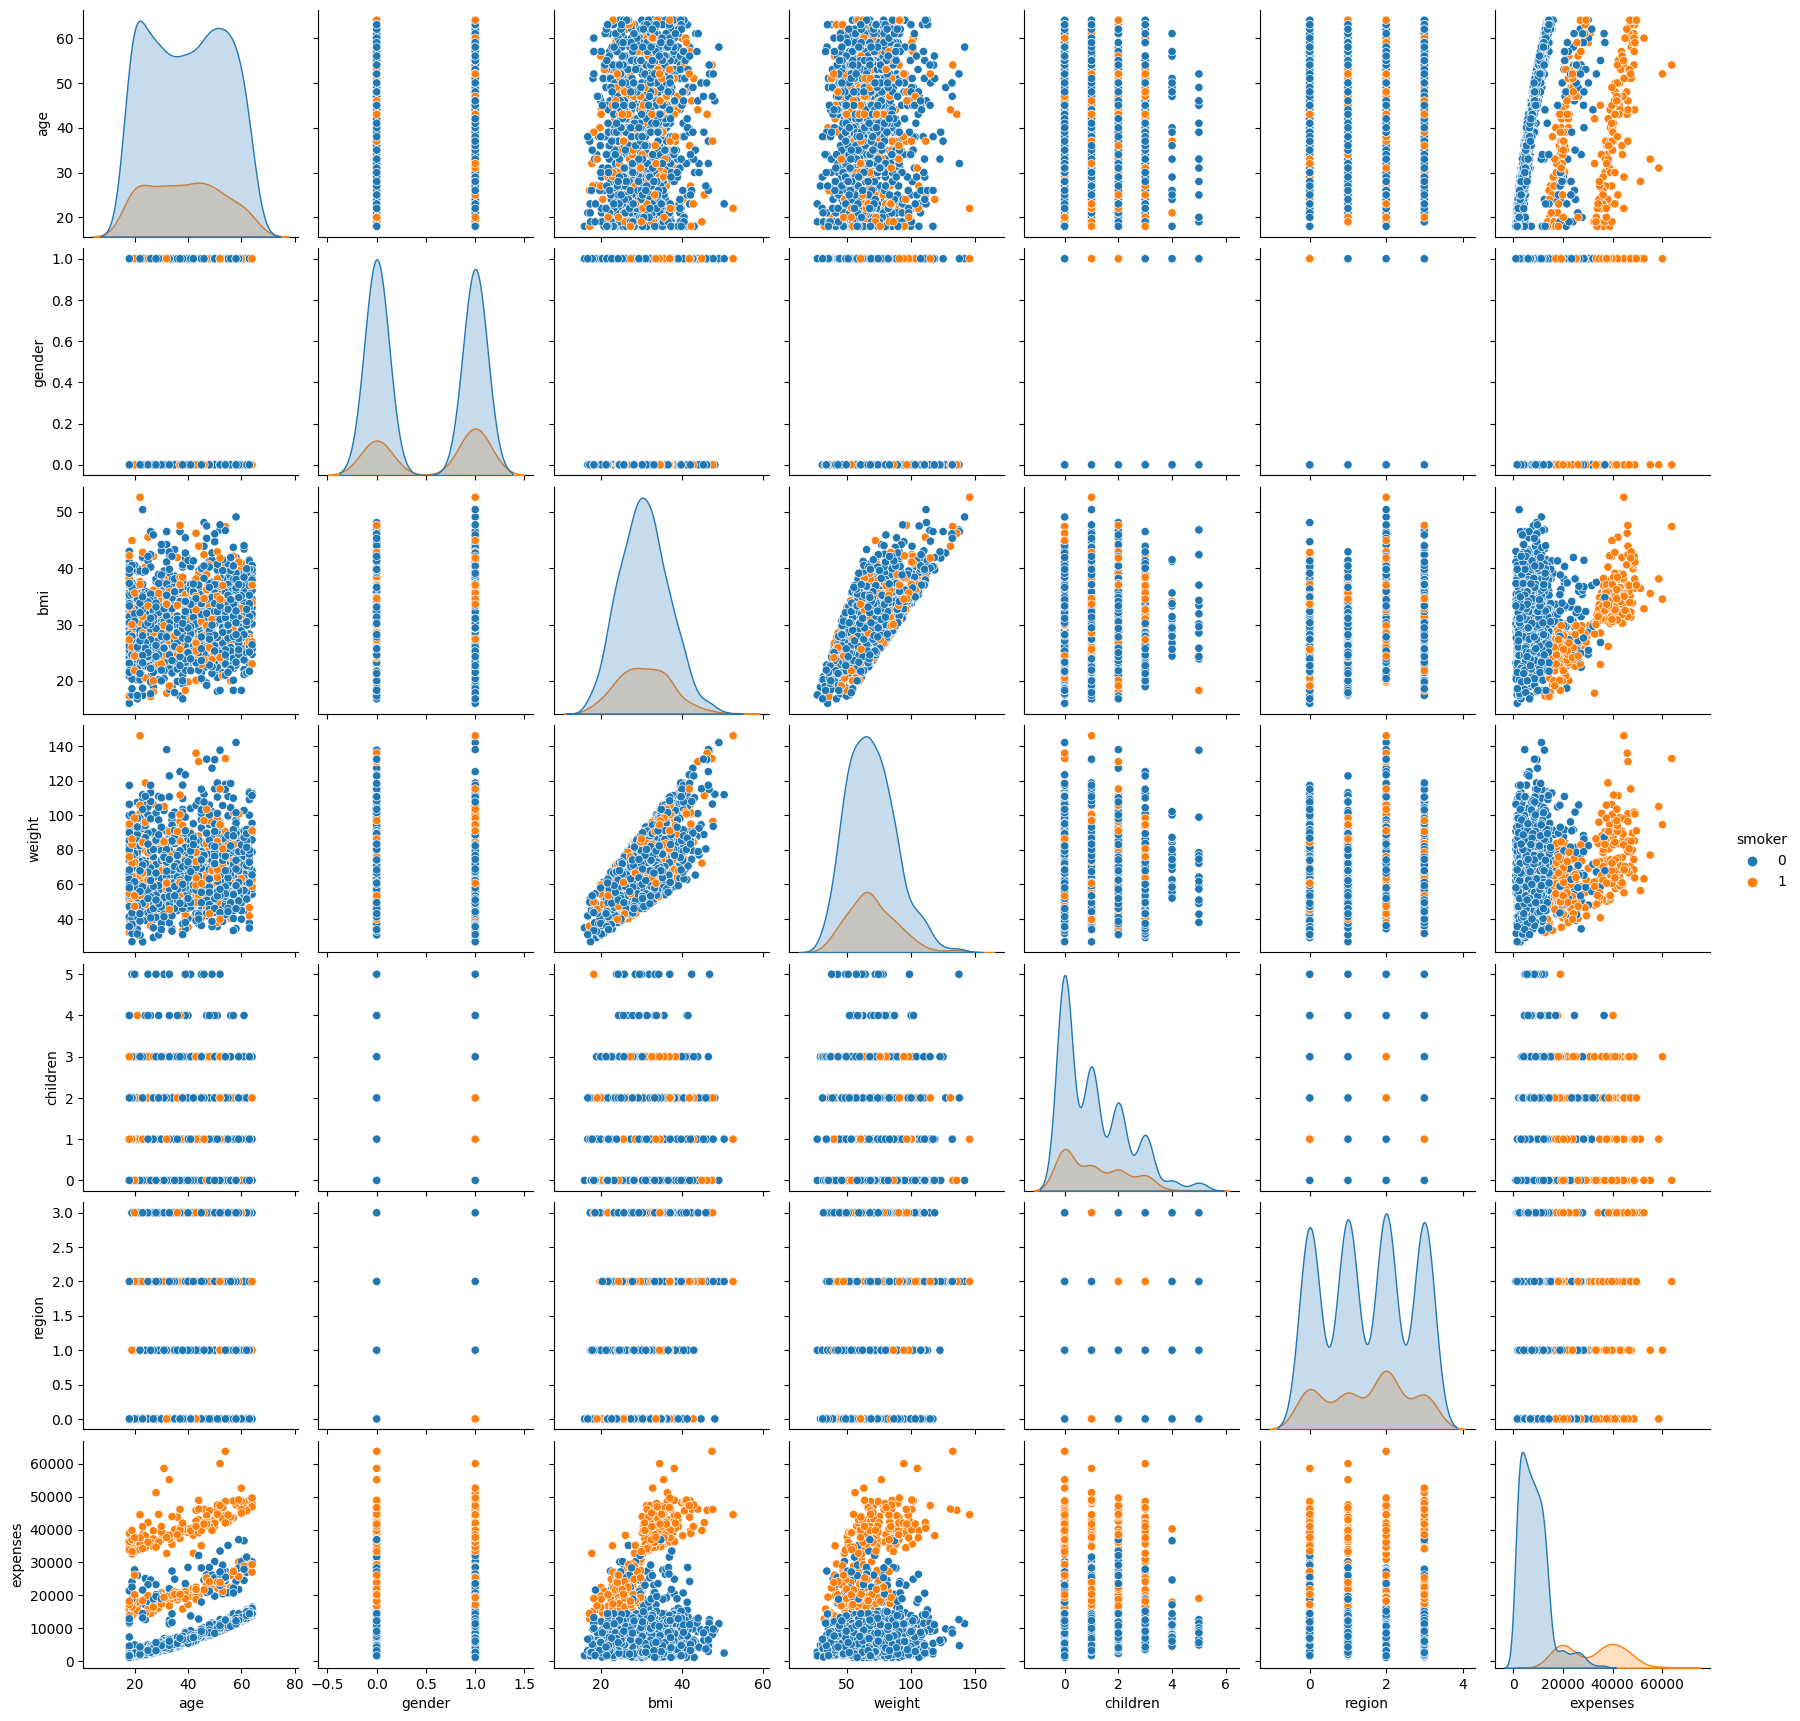

In [11]:
#Apairwise plot shows the relationship between pairs of variables.The plot shows a
# scatterplot of each pair of variables, allowing you to see the nuances of the
# distribution that simply looking  at the correlation may not actually indicate. 

#From this, you can see that there are clear differences in the charges of clients
# that smoke or don’t smoke.
sns.pairplot(df, hue='smoker')
plt.show()

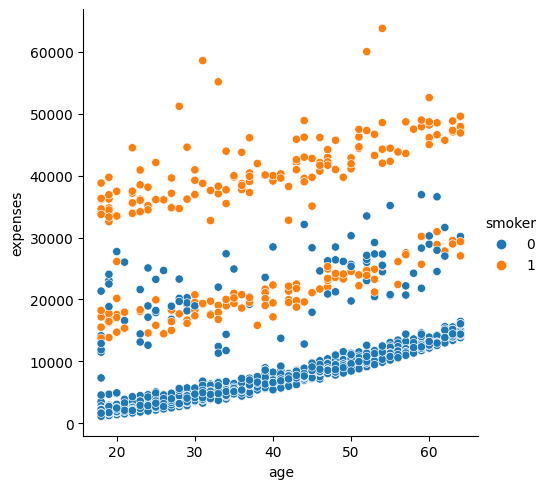

In [12]:
# Plotting a scatterplot of the relationship of age and charges
sns.relplot(data=df, x='age', y='expenses', hue='smoker')
plt.show()

In [101]:
# So we converted the categorical columns into numerical columns using label encoding
# Now we have the data in processed form and need to split it into train and test data
# SO a model has features and labels
# Labels are values we want to predict
# Features are the values used to predict the label
# so we are using all the other columns other than expenses to predict expenses
# First split the data into features and labels before doing train_test_split

X = df[['age']]
y = df['expenses']

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

<AxesSubplot: >

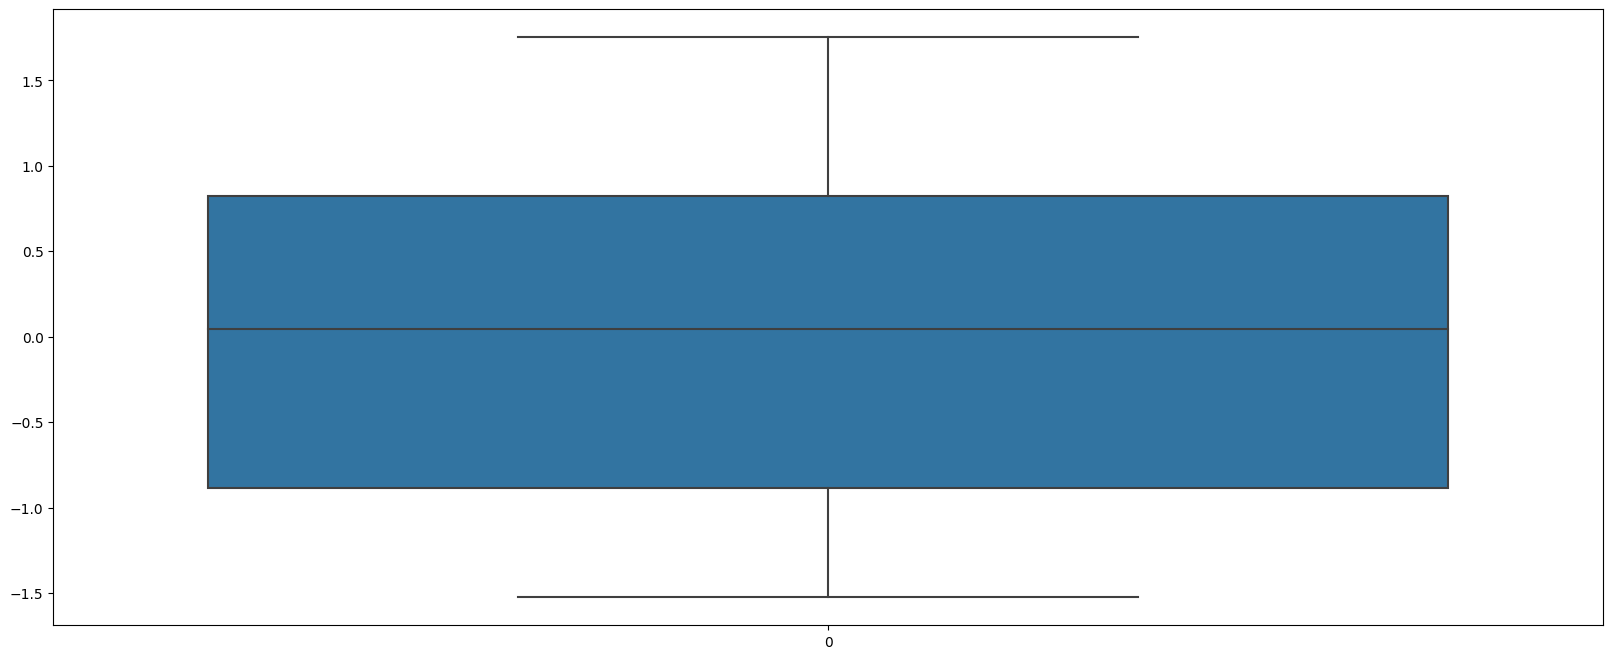

In [103]:
fig, ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=X, ax=ax)

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [108]:
# Train a linear regression model to predict medical expenses (the last column) from other features

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [109]:
predications=regr.predict(x_test)

In [110]:
regr.score(x_test,y_test)

0.09688481564962359

In [112]:
print('Train Score: ', regr.score(x_train, y_train))  
print('Test Score: ', regr.score(x_test, y_test))

Train Score:  0.08518819005725409
Test Score:  0.09688481564962359


In [111]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

# what is line of best fit
print("R^2 : ", r2_score(y_test, predications))

# how close is our regression?
print('MAE:', mean_absolute_error(y_test, predications))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predications)))

R^2 :  0.09688481564962359
MAE: 9467.29649235874
RMSE: 12340.63276086772


In [22]:
# perform all your computations (solve the task) before the questions part, in a clear and effective manner
# in the questions part only print answers based on your solution

#### Questions (answer the quesitons, all computations should precede this part)

#### Question 1

In [23]:
# did you remove any numerical predictor from the data?
# if no - why, if yes - how did you decide on the predictor to remove?
# print a short (one-sentence) answer using the print() command


No, so I checked with correlation matrix and pair plots of dataset to remove the numerical predictors if they have much 
relation. I found most numerical columns useful to remove after EDA. 
 


No, so I checked with correlation matrix and pair plots of dataset to remove the numerical predictors if they have much \nrelation. I found most numerical columns useful to remove after EDA

#### Question 2

In [24]:
# what is the amount of money a person is likely to spend on medical expenses with each additional year of age?
# write here the value itself (hardcoded) based on your solution above
# display your answer as a dataframe (as in assignment 2)


In [118]:
print("R^2: ", regr.score(x_test, y_test))
print("Value of the slope (coefficient of x): ",regr.coef_[0])

result = pd.DataFrame(columns=['Value'])
result.loc['Additional cost per year'] = [regr.coef_[0]]
print(result)

R^2:  0.09688481564962359
Value of the slope (coefficient of x):  3464.78990537938
                                Value
Additional cost per year  3464.789905


#### Question 3

In [33]:
# what predictors have a significant contribution to the medical expenses amount?
# report only signifnicant (P<0.05) predictors sorted by their contribution to the prediction from highest to lowest,
# where for each predictor you specify if it has a positive or a negative effect on the medical expenses

# for categorical variables - specify the effect of individual values that show signfnicant (e.g., "smoker-yes", "smoker-no")

# display your answer as a dataframe with two columns: (1) predictor, (2) effect (positive or negative)
# no need to include the constant (b_0) value

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     26.99
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           3.26e-21
Time:                        03:37:58   Log-Likelihood:                -10059.
No. Observations:                 937   AIC:                         2.013e+04
Df Residuals:                     932   BIC:                         2.015e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.304e+04    364.736     35.748      0.0

In [100]:
import statsmodels.api as sm

x = sm.add_constant(x_train) # adding a constant

model = sm.OLS(y_train, x_train).fit()

p_values = model.summary2().tables[1]['P>|t|']

significance = p_values[p_values < 0.05]

coef = model.params[significance.index]
contribution.rename(columns={'predictor':'variable', 'effect': 'coefficient'}, inplace=True)

print(contribution)

       variable  coefficient
age          x1  4334.231870
bmi          x3  2278.231200
smoker       x6  9321.838971
